<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Effect-of-Hidden-Layer" data-toc-modified-id="Effect-of-Hidden-Layer-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Effect of Hidden Layer</a></span></li><li><span><a href="#Effect-of-Batch-Size" data-toc-modified-id="Effect-of-Batch-Size-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Effect of Batch Size</a></span></li><li><span><a href="#Rendering" data-toc-modified-id="Rendering-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Rendering</a></span></li></ul></li></ul></div>

In [1]:
import warnings
import msmexplorer as msme
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import pandas as pd
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load,dump

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.

Populating the interactive namespace from numpy and matplotlib


In [2]:
feat = load("/home/sbhakat/Plm-TICA-TIP4P-MD/featurizer.pkl")

In [21]:
df = pd.read_pickle("/home/sbhakat/Plm-TICA-TIP4P-MD/feature_descriptor.pkl")

In [4]:
df

atominds featuregroup featurizer otherinfo resids resnames  \
0       [15, 17, 19, 22]         chi1   Dihedral       sin   [75]    [GLU]   
1       [30, 32, 34, 37]         chi1   Dihedral       sin   [76]    [MET]   
2       [47, 49, 51, 54]         chi1   Dihedral       sin   [77]    [ASN]   
3       [61, 63, 65, 68]         chi1   Dihedral       sin   [78]    [TYR]   
4       [82, 84, 86, 88]         chi1   Dihedral       sin   [79]    [VAL]   
5    [98, 100, 102, 105]         chi1   Dihedral       sin   [80]    [SER]   
6   [116, 118, 120, 126]         chi1   Dihedral       sin   [82]    [THR]   
7   [130, 132, 134, 136]         chi1   Dihedral       sin   [83]    [VAL]   
8   [146, 148, 150, 153]         chi1   Dihedral       sin   [84]    [SER]   
9       [15, 17, 19, 22]         chi1   Dihedral       cos   [75]    [GLU]   
10      [30, 32, 34, 37]         chi1   Dihedral       cos   [76]    [MET]   
11      [47, 49, 51, 54]         chi1   Dihedral       cos   [77]    [ASN]   
12      [61, 63, 65, 68]         chi1   Dihedral       cos   [78]    [TYR]   
13      [82, 84, 86, 88]         chi1   Dihedral       cos   [79]    [VAL]   
14   [98, 100, 102, 105]         chi1   Dihedral       cos   [80]    [SER]   
15  [116, 118, 120, 126]         chi1   Dihedral       cos   [82]    [THR]   
16  [130, 132, 134, 136]         chi1   Dihedral       cos   [83]    [VAL]   
17  [146, 148, 150, 153]         chi1   Dihedral       cos   [84]    [SER]   
18      [17, 19, 22, 25]         chi2   Dihedral       sin   [75]    [GLU]   
19      [32, 34, 37, 40]         chi2   Dihedral       sin   [76]    [MET]   
20      [49, 51, 54, 55]         chi2   Dihedral       sin   [77]    [ASN]   
21      [63, 65, 68, 69]         chi2   Dihedral       sin   [78]    [TYR]   
22      [17, 19, 22, 25]         chi2   Dihedral       cos   [75]    [GLU]   
23      [32, 34, 37, 40]         chi2   Dihedral       cos   [76]    [MET]   
24      [49, 51, 54, 55]         chi2   Dihedral       cos   [77]    [ASN]   
25      [63, 65, 68, 69]         chi2   Dihedral       cos   [78]    [TYR]   

   resseqs  
0     [76]  
1     [77]  
2     [78]  
3     [79]  
4     [80]  
5     [81]  
6     [83]  
7     [84]  
8     [85]  
9     [76]  
10    [77]  
11    [78]  
12    [79]  
13    [80]  
14    [81]  
15    [83]  
16    [84]  
17    [85]  
18    [76]  
19    [77]  
20    [78]  
21    [79]  
22    [76]  
23    [77]  
24    [78]  
25    [79]

In [2]:
tica_mdl =load("/home/sbhakat/Plm-TICA-TIP4P-MD/tica_mdl_flapchi1angle.pkl")

In [3]:
tica_mdl

tICA(commute_mapping=False, kinetic_mapping=False, lag_time=10, n_components=5,
     shrinkage=None)

Text(0, 0.5, 'Weights')

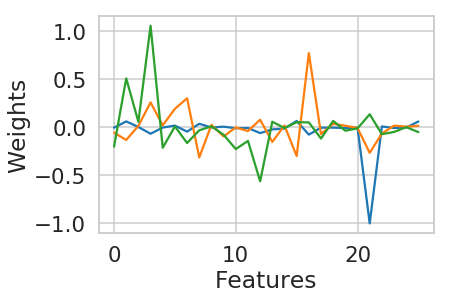

In [7]:
plot(tica_mdl.components_[0])
plot(tica_mdl.components_[1])
plot(tica_mdl.components_[2])
xlabel("Features")
ylabel("Weights")

Text(0, 0.5, 'Frames')

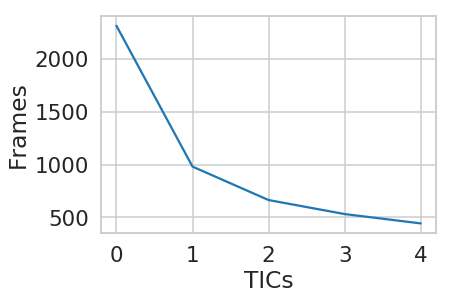

In [8]:
plot(tica_mdl.timescales_)
xlabel("TICs")
ylabel("Frames")

In [4]:
tica_data = load("/home/sbhakat/Plm-TICA-TIP4P-MD/tica_data.pkl")

In [9]:
import torch
from vde import VDE

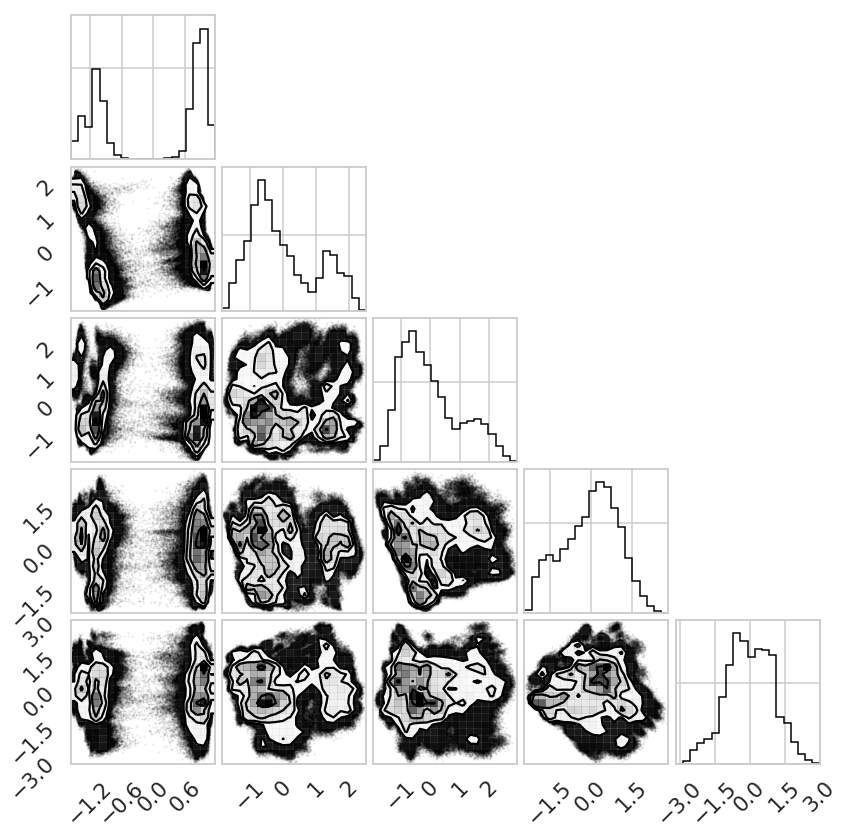

In [10]:
%matplotlib inline
import msmexplorer as msme
import numpy as np
txx = np.concatenate(tica_data)
_ = msme.plot_histogram(txx)

In [27]:
model = VDE(5,lag_time=10,hidden_layer_depth=2,hidden_size=25,n_epochs=100,batch_size=400,learning_rate=1e-2)
model.dtype = torch.DoubleTensor
model.use_cuda =False
model.cpu()
model.double()
model.fit(tica_data)
torch.save(model,"/home/sbhakat/Plm-TICA-TIP4P-MD/trained_plm.pkl")

Epoch: 0
Batch 100, loss = 0.8176
rec_loss = 0.8089, autocorr_loss = 0.0087
Epoch: 1
Batch 100, loss = 0.7512
rec_loss = 0.7469, autocorr_loss = 0.0043
Epoch: 2
Batch 100, loss = 0.5812
rec_loss = 0.5791, autocorr_loss = 0.0022
Epoch: 3
Batch 100, loss = 0.5060
rec_loss = 0.5029, autocorr_loss = 0.0031
Epoch: 4
Batch 100, loss = 0.5102
rec_loss = 0.5056, autocorr_loss = 0.0046
Epoch: 5
Batch 100, loss = 0.4687
rec_loss = 0.4660, autocorr_loss = 0.0027
Epoch: 6
Batch 100, loss = 0.4501
rec_loss = 0.4425, autocorr_loss = 0.0076
Epoch: 7
Batch 100, loss = 0.3667
rec_loss = 0.3621, autocorr_loss = 0.0046
Epoch: 8
Batch 100, loss = 0.3323
rec_loss = 0.3165, autocorr_loss = 0.0158
Epoch: 9
Batch 100, loss = 0.3010
rec_loss = 0.2910, autocorr_loss = 0.0100
Epoch: 10
Batch 100, loss = 0.2798
rec_loss = 0.2770, autocorr_loss = 0.0028
Epoch: 11
Batch 100, loss = 0.2662
rec_loss = 0.2629, autocorr_loss = 0.0034
Epoch: 12
Batch 100, loss = 0.3020
rec_loss = 0.2945, autocorr_loss = 0.0076
Epoch: 13

In [28]:
model = torch.load("/home/sbhakat/Plm-TICA-TIP4P-MD/trained_plm.pkl")

In [13]:
from torch.autograd import Variable

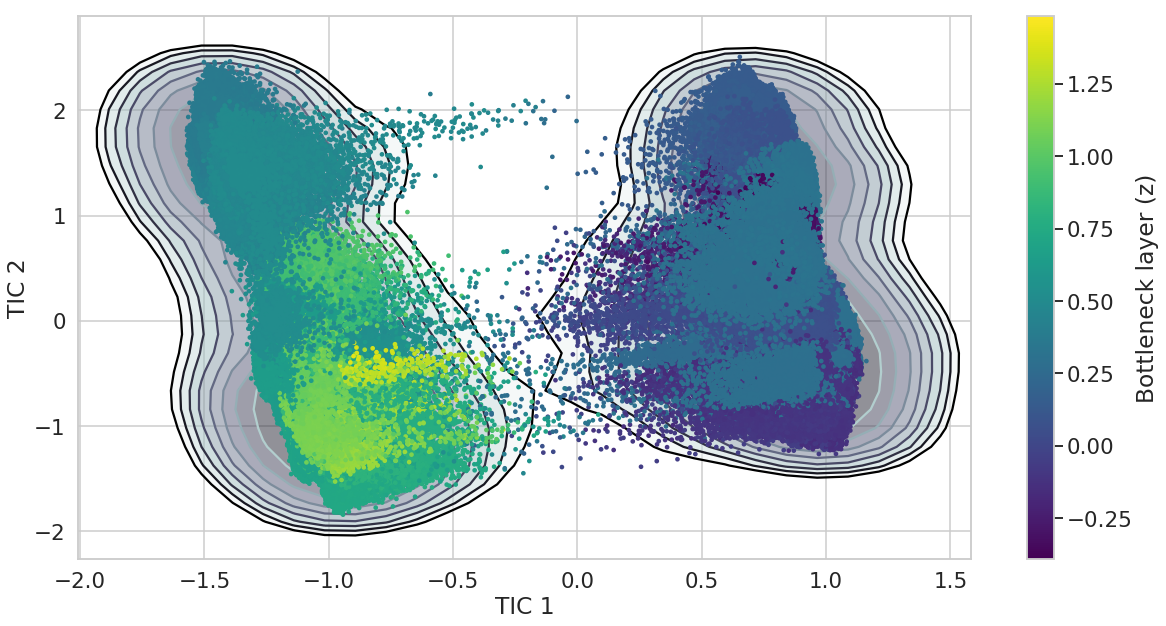

In [29]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
msme.plot_free_energy(txx, obs=(0, 1), n_samples=100000)
p=scatter(txx[:,0],txx[:,1],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 2")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

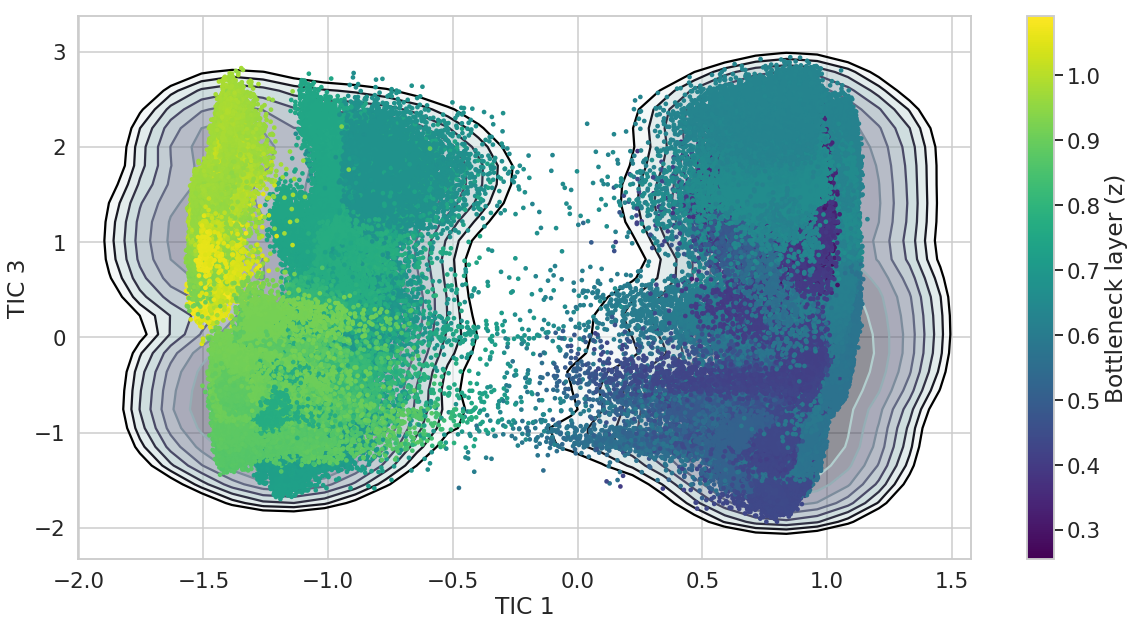

In [16]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
msme.plot_free_energy(txx, obs=(0, 2), n_samples=100000)
p=scatter(txx[:,0],txx[:,2],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 3")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

Text(0, 0.5, 'Free Energy')

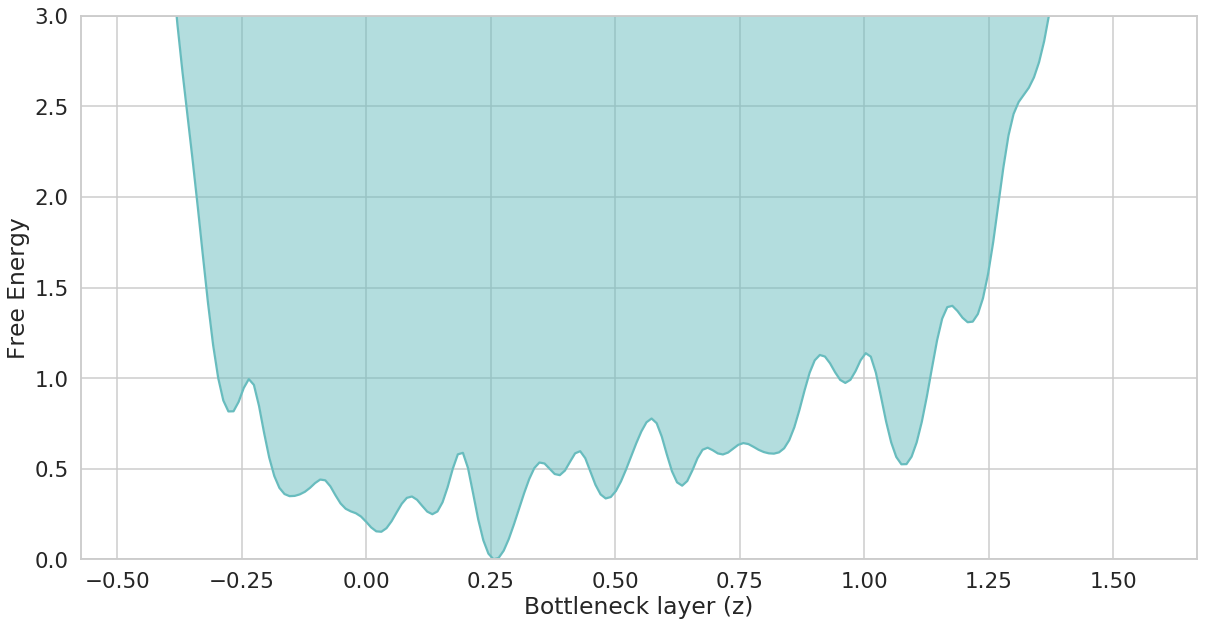

In [30]:
msme.plot_free_energy(output,gridsize=200)
ylim([0,3])
xlabel("Bottleneck layer (z)")
ylabel("Free Energy")

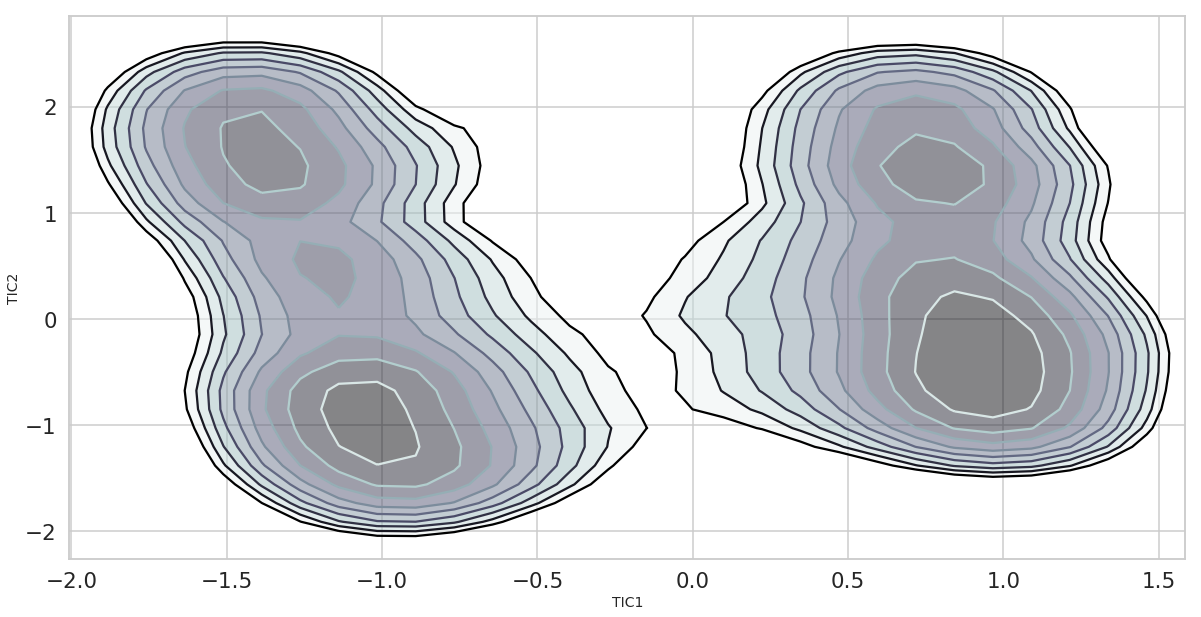

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
msme.plot_free_energy(txx, obs=(0, 1), n_samples=100000,
                      xlabel='TIC1', ylabel='TIC2')

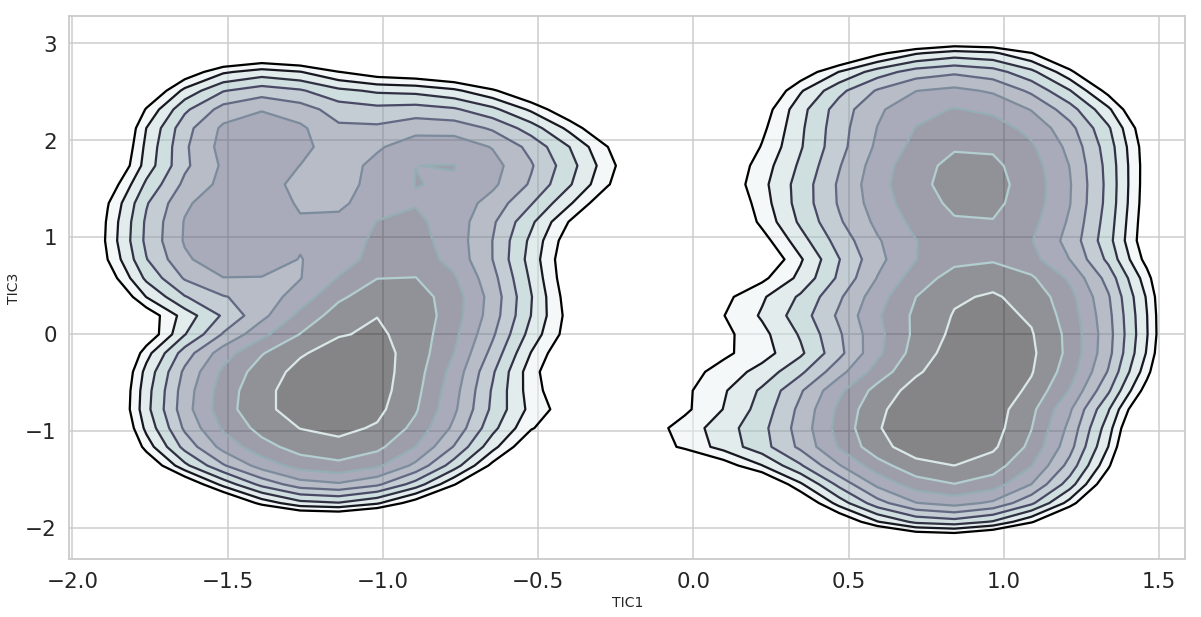

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
msme.plot_free_energy(txx, obs=(0, 2), n_samples=100000,
                      xlabel='TIC1', ylabel='TIC3')

Text(0, 0.5, 'Free Energy')

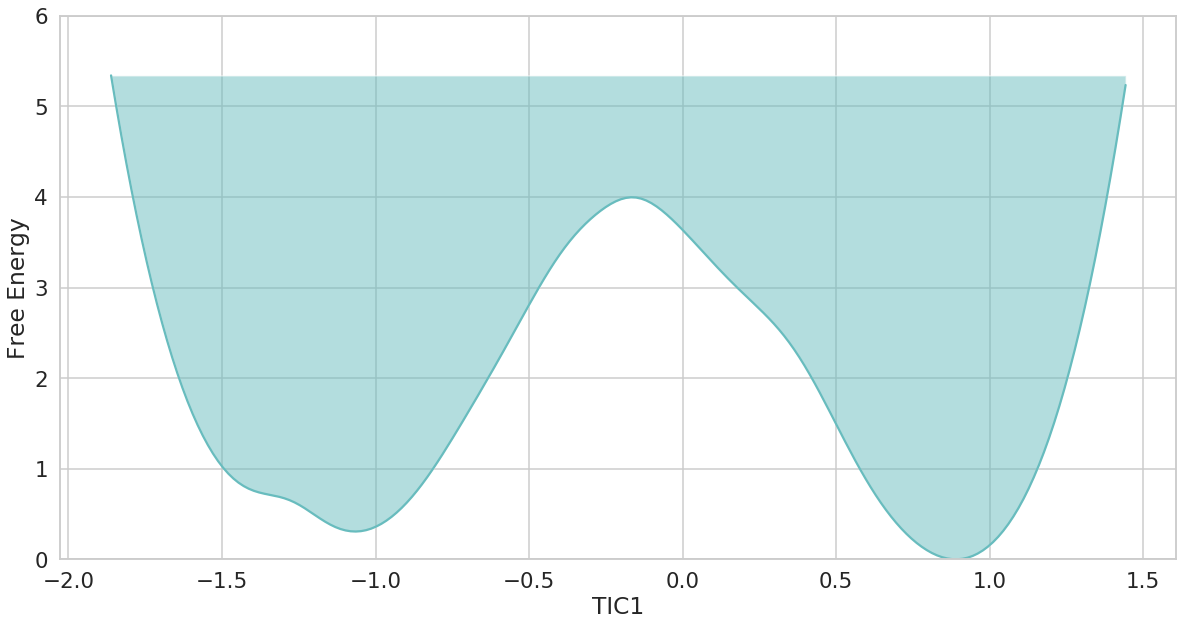

In [21]:
msme.plot_free_energy(txx, obs=(0), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC1")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

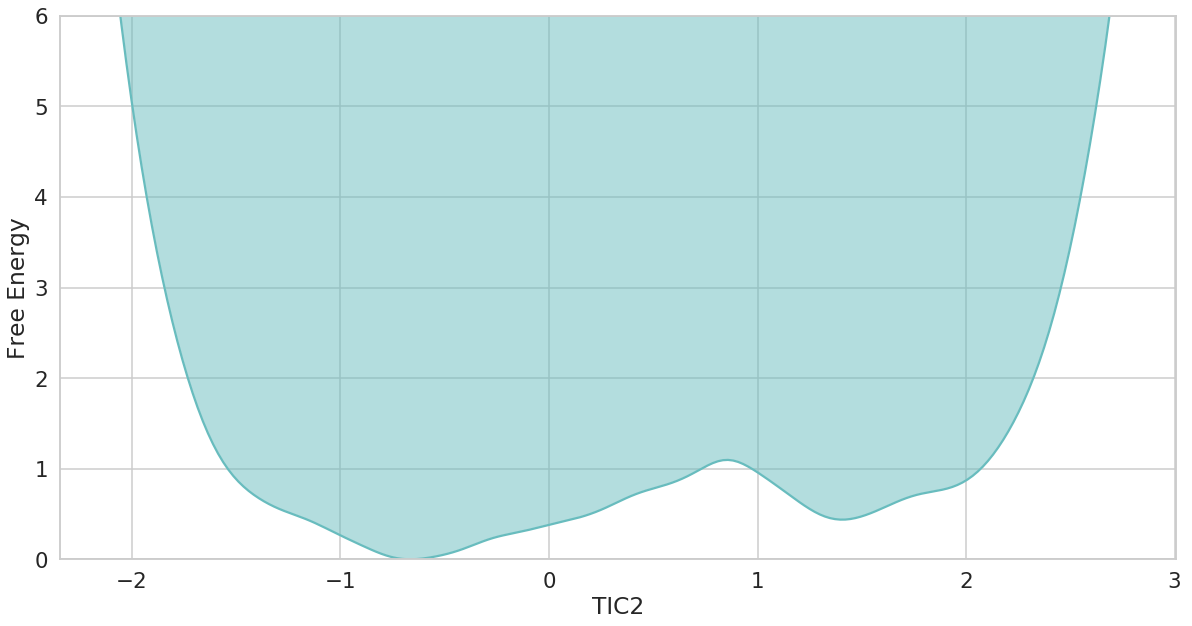

In [26]:
msme.plot_free_energy(txx, obs=(1), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC2")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

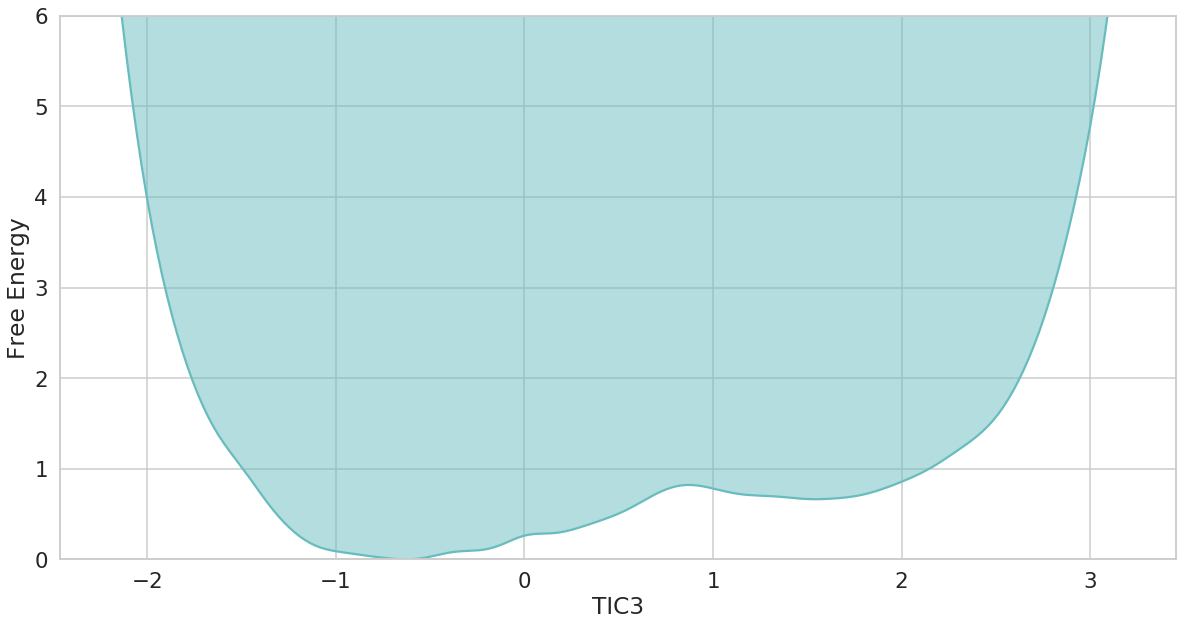

In [27]:
msme.plot_free_energy(txx, obs=(2), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC3")
ylabel("Free Energy")

Text(0, 0.5, 'Free Energy')

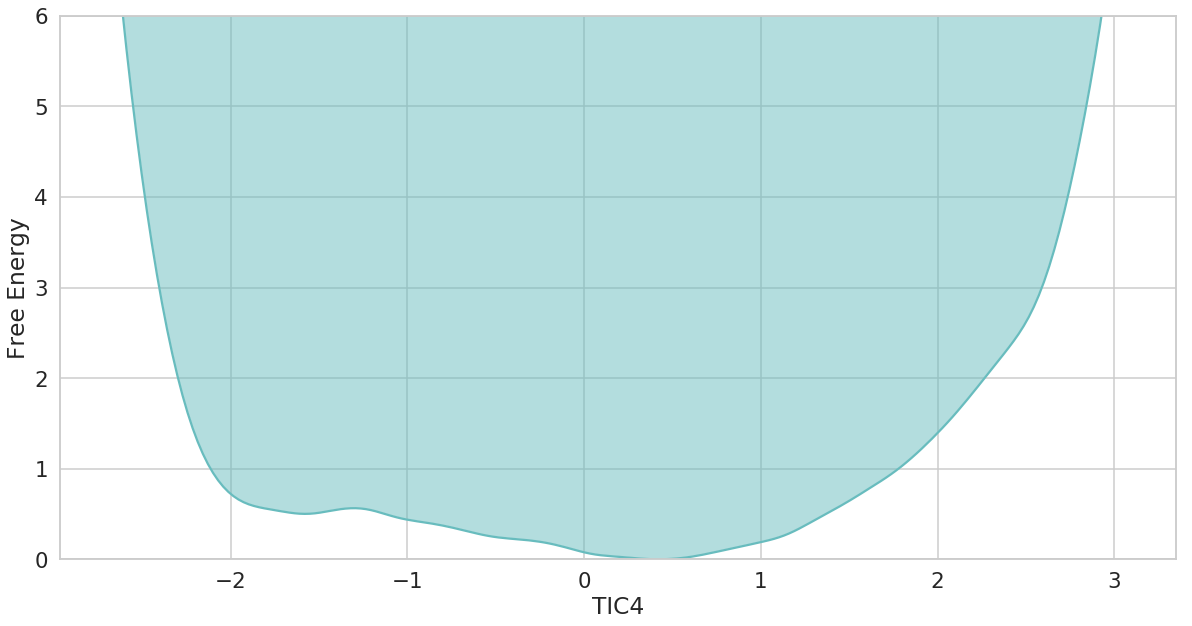

In [28]:
msme.plot_free_energy(txx, obs=(3), n_samples=100000,gridsize=200)
ylim([0,6])
xlabel("TIC4")
ylabel("Free Energy")

In [31]:
from vde_metadynamics.render_tics import *
from vde_metadynamics.render_df import *
from vde_metadynamics.render_network import *

In [33]:
VDE.compute_loss

<function vde.vde.VDE.compute_loss>

In [37]:
all_output = []
all_out=[]
all_out.append("RESTART\n")
# Lets only calculate the contacts that are actually needed by the tica calculation/neural network 
inds = np.unique(np.nonzero(tica_mdl.components_[:5, :])[1])
all_out.extend(render_df(df=df, inds=inds, tica_mdl=tica_mdl))
# We only need the first 5 tics
for i in range(5):
    all_out.extend(render_tic(tica_mdl=tica_mdl, tic_index=i, output_label_prefix="l0"))
# Convert the VDE model into something Plumed can understand
all_out.extend(render_network(model))

2
Linear(in_features=25, out_features=25, bias=True) 3
3
Swish(
  (sigmoid): Sigmoid()
) 4
4
Linear(in_features=25, out_features=25, bias=True) 5
5
Swish(
  (sigmoid): Sigmoid()
) 6


In [38]:
print("".join(all_out))

RESTART
TORSION ATOMS=16,18,20,23 LABEL=chi1_75 

TORSION ATOMS=31,33,35,38 LABEL=chi1_76 

TORSION ATOMS=48,50,52,55 LABEL=chi1_77 

TORSION ATOMS=62,64,66,69 LABEL=chi1_78 

TORSION ATOMS=83,85,87,89 LABEL=chi1_79 

TORSION ATOMS=99,101,103,106 LABEL=chi1_80 

TORSION ATOMS=117,119,121,127 LABEL=chi1_82 

TORSION ATOMS=131,133,135,137 LABEL=chi1_83 

TORSION ATOMS=147,149,151,154 LABEL=chi1_84 

TORSION ATOMS=18,20,23,26 LABEL=chi2_75 

TORSION ATOMS=33,35,38,41 LABEL=chi2_76 

TORSION ATOMS=50,52,55,56 LABEL=chi2_77 

TORSION ATOMS=64,66,69,70 LABEL=chi2_78 

MATHEVAL ARG=chi1_75 FUNC=sin(x)-0.285929107851 LABEL=f0_0 PERIODIC=NO 

MATHEVAL ARG=chi1_76 FUNC=sin(x)--0.103304382183 LABEL=f0_1 PERIODIC=NO 

MATHEVAL ARG=chi1_77 FUNC=sin(x)--0.425725706096 LABEL=f0_2 PERIODIC=NO 

MATHEVAL ARG=chi1_78 FUNC=sin(x)--0.708575812944 LABEL=f0_3 PERIODIC=NO 

MATHEVAL ARG=chi1_79 FUNC=sin(x)--0.0373646524319 LABEL=f0_4 PERIODIC=NO 

MATHEVAL ARG=chi1_80 FUNC=sin(x)-0.0556835842277 LABEL=f0_5 P

## Effect of Hidden Layer

In [11]:
model = VDE(2,lag_time=25,hidden_layer_depth=3,hidden_size=20,n_epochs=100,batch_size=400,learning_rate=1e-2)
model.dtype = torch.DoubleTensor
model.use_cuda =False
model.cpu()
model.double()
model.fit(tica_data)
torch.save(model,"trained_plm-h3.pkl")

Epoch: 0
Batch 100, loss = 0.5058
rec_loss = 0.4872, autocorr_loss = 0.0186
Epoch: 1
Batch 100, loss = 0.3729
rec_loss = 0.3500, autocorr_loss = 0.0229
Epoch: 2
Batch 100, loss = 0.2254
rec_loss = 0.2056, autocorr_loss = 0.0198
Epoch: 3
Batch 100, loss = 0.2374
rec_loss = 0.1920, autocorr_loss = 0.0454
Epoch: 4
Batch 100, loss = 0.2044
rec_loss = 0.1834, autocorr_loss = 0.0210
Epoch: 5
Batch 100, loss = 0.2094
rec_loss = 0.1612, autocorr_loss = 0.0483
Epoch: 6
Batch 100, loss = 0.2007
rec_loss = 0.1701, autocorr_loss = 0.0306
Epoch: 7
Batch 100, loss = 0.2427
rec_loss = 0.2018, autocorr_loss = 0.0409
Epoch: 8
Batch 100, loss = 0.1995
rec_loss = 0.1576, autocorr_loss = 0.0419
Epoch: 9
Batch 100, loss = 0.2535
rec_loss = 0.2111, autocorr_loss = 0.0424
Epoch: 10
Batch 100, loss = 0.2444
rec_loss = 0.1994, autocorr_loss = 0.0451
Epoch: 11
Batch 100, loss = 0.2477
rec_loss = 0.2144, autocorr_loss = 0.0334
Epoch: 12
Batch 100, loss = 0.2293
rec_loss = 0.1936, autocorr_loss = 0.0357
Epoch: 13

In [14]:
model = torch.load("trained_plm-h3.pkl")

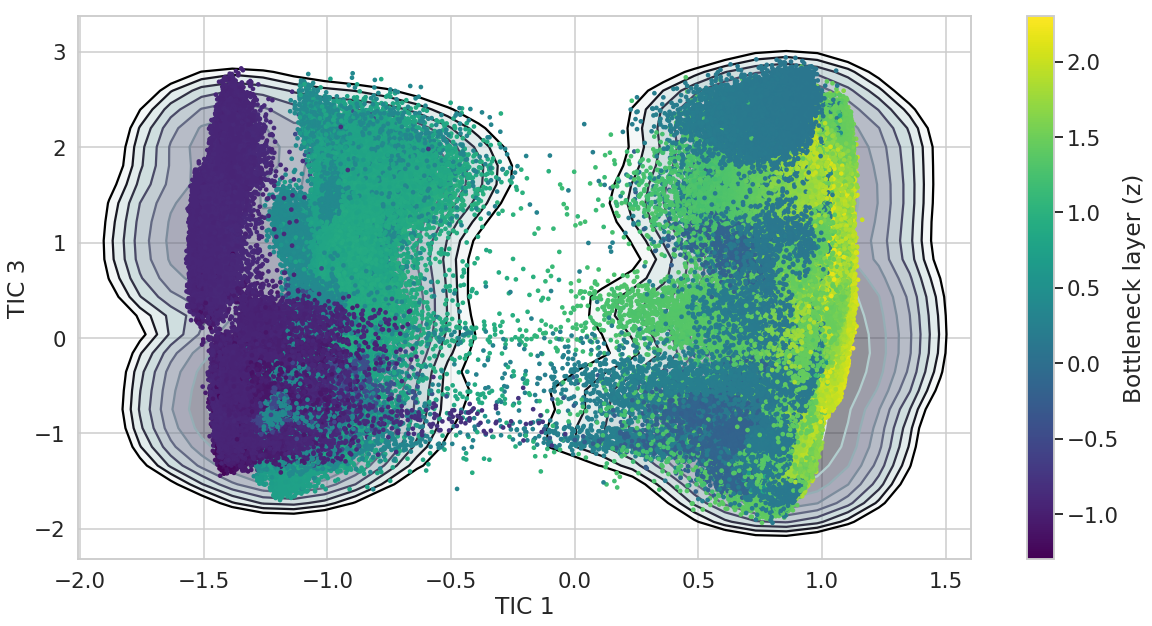

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
msme.plot_free_energy(txx, obs=(0, 2), n_samples=100000)
p=scatter(txx[:,0],txx[:,2],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 3")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

## Effect of Batch Size

In [19]:
model = VDE(2,lag_time=25,hidden_layer_depth=2,hidden_size=20,n_epochs=100,batch_size=100,learning_rate=1e-2)
model.dtype = torch.DoubleTensor
model.use_cuda =False
model.cpu()
model.double()
model.fit(tica_data)
torch.save(model,"trained_plm-batch100.pkl")

Epoch: 0
Batch 100, loss = 0.9688
rec_loss = 0.9484, autocorr_loss = 0.0204
Batch 200, loss = 0.7178
rec_loss = 0.6875, autocorr_loss = 0.0303
Batch 300, loss = 0.5726
rec_loss = 0.5562, autocorr_loss = 0.0164
Batch 400, loss = 0.6123
rec_loss = 0.5832, autocorr_loss = 0.0291
Batch 500, loss = 0.3499
rec_loss = 0.3150, autocorr_loss = 0.0349
Batch 600, loss = 0.2405
rec_loss = 0.2102, autocorr_loss = 0.0303
Epoch: 1
Batch 100, loss = 0.1993
rec_loss = 0.1808, autocorr_loss = 0.0184
Batch 200, loss = 0.2413
rec_loss = 0.2134, autocorr_loss = 0.0279
Batch 300, loss = 0.1925
rec_loss = 0.1611, autocorr_loss = 0.0314
Batch 400, loss = 0.2746
rec_loss = 0.2479, autocorr_loss = 0.0267
Batch 500, loss = 0.1761
rec_loss = 0.1556, autocorr_loss = 0.0204
Batch 600, loss = 0.3034
rec_loss = 0.2534, autocorr_loss = 0.0500
Epoch: 2
Batch 100, loss = 0.3419
rec_loss = 0.1694, autocorr_loss = 0.1725
Batch 200, loss = 0.2300
rec_loss = 0.2123, autocorr_loss = 0.0177
Batch 300, loss = 0.2644
rec_loss =

Epoch: 20
Batch 100, loss = 0.2335
rec_loss = 0.1780, autocorr_loss = 0.0556
Batch 200, loss = 0.2411
rec_loss = 0.1453, autocorr_loss = 0.0959
Batch 300, loss = 0.2382
rec_loss = 0.1744, autocorr_loss = 0.0638
Batch 400, loss = 0.1926
rec_loss = 0.1664, autocorr_loss = 0.0262
Batch 500, loss = 0.1653
rec_loss = 0.1188, autocorr_loss = 0.0465
Batch 600, loss = 0.1883
rec_loss = 0.1441, autocorr_loss = 0.0442
Epoch: 21
Batch 100, loss = 0.1855
rec_loss = 0.1514, autocorr_loss = 0.0341
Batch 200, loss = 0.1747
rec_loss = 0.1367, autocorr_loss = 0.0380
Batch 300, loss = 0.2695
rec_loss = 0.2179, autocorr_loss = 0.0516
Batch 400, loss = 0.1390
rec_loss = 0.1169, autocorr_loss = 0.0221
Batch 500, loss = 0.1919
rec_loss = 0.1351, autocorr_loss = 0.0568
Batch 600, loss = 0.2330
rec_loss = 0.1820, autocorr_loss = 0.0510
Epoch: 22
Batch 100, loss = 0.1430
rec_loss = 0.1216, autocorr_loss = 0.0214
Batch 200, loss = 0.2314
rec_loss = 0.1920, autocorr_loss = 0.0394
Batch 300, loss = 0.2174
rec_los

Epoch: 40
Batch 100, loss = 0.1361
rec_loss = 0.1009, autocorr_loss = 0.0352
Batch 200, loss = 0.1290
rec_loss = 0.0993, autocorr_loss = 0.0297
Batch 300, loss = 0.1765
rec_loss = 0.1268, autocorr_loss = 0.0496
Batch 400, loss = 0.1622
rec_loss = 0.1304, autocorr_loss = 0.0319
Batch 500, loss = 0.1479
rec_loss = 0.1142, autocorr_loss = 0.0338
Batch 600, loss = 0.1651
rec_loss = 0.1240, autocorr_loss = 0.0411
Epoch: 41
Batch 100, loss = 0.1245
rec_loss = 0.0968, autocorr_loss = 0.0276
Batch 200, loss = 0.2251
rec_loss = 0.1611, autocorr_loss = 0.0641
Batch 300, loss = 0.1591
rec_loss = 0.1266, autocorr_loss = 0.0325
Batch 400, loss = 0.1821
rec_loss = 0.1485, autocorr_loss = 0.0335
Batch 500, loss = 0.1621
rec_loss = 0.1285, autocorr_loss = 0.0337
Batch 600, loss = 0.2350
rec_loss = 0.1813, autocorr_loss = 0.0537
Epoch: 42
Batch 100, loss = 0.2745
rec_loss = 0.2149, autocorr_loss = 0.0596
Batch 200, loss = 0.1390
rec_loss = 0.1078, autocorr_loss = 0.0313
Batch 300, loss = 0.1509
rec_los

Epoch: 60
Batch 100, loss = 0.2210
rec_loss = 0.1712, autocorr_loss = 0.0498
Batch 200, loss = 0.3237
rec_loss = 0.2683, autocorr_loss = 0.0554
Batch 300, loss = 0.1629
rec_loss = 0.1284, autocorr_loss = 0.0345
Batch 400, loss = 0.1455
rec_loss = 0.1217, autocorr_loss = 0.0237
Batch 500, loss = 0.2582
rec_loss = 0.2152, autocorr_loss = 0.0429
Batch 600, loss = 0.2140
rec_loss = 0.1544, autocorr_loss = 0.0596
Epoch: 61
Batch 100, loss = 0.2118
rec_loss = 0.1663, autocorr_loss = 0.0455
Batch 200, loss = 0.1872
rec_loss = 0.1576, autocorr_loss = 0.0295
Batch 300, loss = 0.1962
rec_loss = 0.1471, autocorr_loss = 0.0492
Batch 400, loss = 0.1679
rec_loss = 0.1287, autocorr_loss = 0.0392
Batch 500, loss = 0.2027
rec_loss = 0.1414, autocorr_loss = 0.0613
Batch 600, loss = 0.1359
rec_loss = 0.1079, autocorr_loss = 0.0280
Epoch: 62
Batch 100, loss = 0.2288
rec_loss = 0.1786, autocorr_loss = 0.0501
Batch 200, loss = 0.2694
rec_loss = 0.1865, autocorr_loss = 0.0829
Batch 300, loss = 0.2129
rec_los

Epoch: 80
Batch 100, loss = 0.2585
rec_loss = 0.1535, autocorr_loss = 0.1050
Batch 200, loss = 0.1861
rec_loss = 0.1570, autocorr_loss = 0.0291
Batch 300, loss = 0.1763
rec_loss = 0.1331, autocorr_loss = 0.0431
Batch 400, loss = 0.1617
rec_loss = 0.1500, autocorr_loss = 0.0117
Batch 500, loss = 0.2474
rec_loss = 0.1785, autocorr_loss = 0.0689
Batch 600, loss = 0.1958
rec_loss = 0.1513, autocorr_loss = 0.0445
Epoch: 81
Batch 100, loss = 0.2546
rec_loss = 0.1510, autocorr_loss = 0.1036
Batch 200, loss = 0.1720
rec_loss = 0.1259, autocorr_loss = 0.0460
Batch 300, loss = 0.1821
rec_loss = 0.1329, autocorr_loss = 0.0492
Batch 400, loss = 0.1792
rec_loss = 0.1262, autocorr_loss = 0.0530
Batch 500, loss = 0.1946
rec_loss = 0.1635, autocorr_loss = 0.0311
Batch 600, loss = 0.2705
rec_loss = 0.1567, autocorr_loss = 0.1138
Epoch: 82
Batch 100, loss = 0.2294
rec_loss = 0.1711, autocorr_loss = 0.0583
Batch 200, loss = 0.1922
rec_loss = 0.1570, autocorr_loss = 0.0352
Batch 300, loss = 0.1943
rec_los

In [20]:
model = torch.load("trained_plm-batch100.pkl")

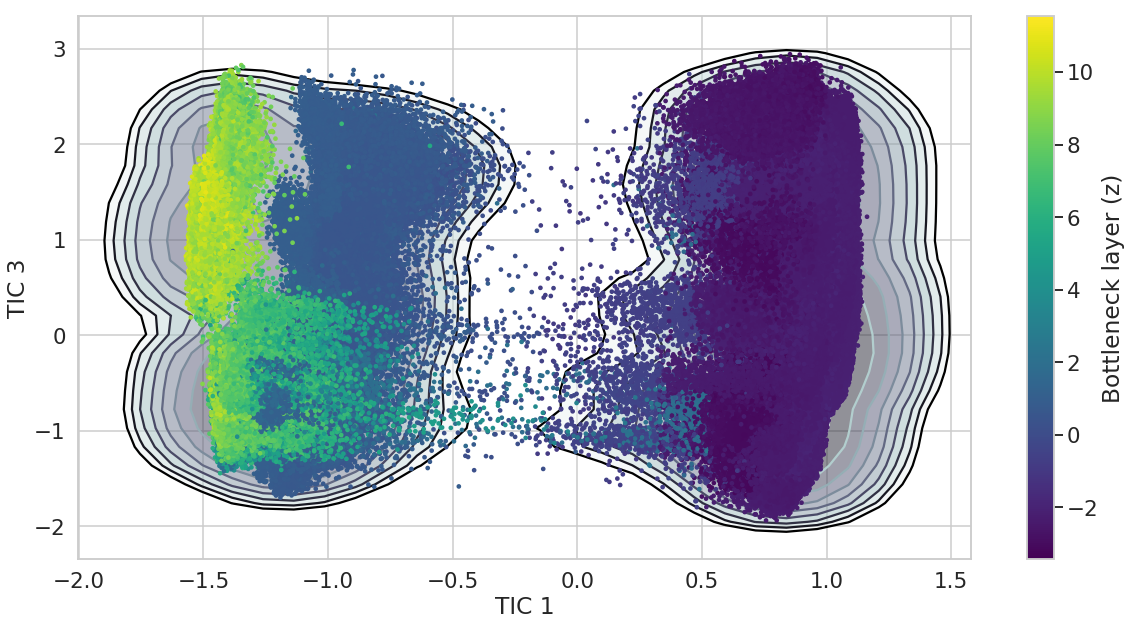

In [21]:
plt.rcParams["figure.figsize"] = (20,10)
model.eval()
X=Variable(torch.from_numpy(txx[:,:model.input_size]).type(model.dtype))
output = model.encoder.output_layer(model.encoder.hidden_network(model.encoder.input_layer(X))).cpu().data.numpy()
msme.plot_free_energy(txx, obs=(0, 2), n_samples=100000)
p=scatter(txx[:,0],txx[:,2],c=np.squeeze(output),cmap='viridis', s=10)
xlabel("TIC 1")
ylabel("TIC 3")
cb=colorbar(p,orientation="vertical")
cb.set_label("Bottleneck layer (z)")

## Rendering

In [18]:
from vde_metadynamics.render_tics import *
from vde_metadynamics.render_df import *
from vde_metadynamics.render_network import *

In [19]:
all_out=[]
# Add the restart
all_out.append("RESTART\n")
# Convert the raw dihedrals into something plumed can understand
all_out.extend(render_df(df))
# Convert the VDE model into something Plumed can understand
all_out.extend(render_network(model))

2
Linear(in_features=20, out_features=20, bias=True) 3
3
Swish(
  (sigmoid): Sigmoid()
) 4
4
Linear(in_features=20, out_features=20, bias=True) 5
5
Swish(
  (sigmoid): Sigmoid()
) 6


In [20]:
print("".join(all_out))

RESTART
TORSION ATOMS=16,18,20,23 LABEL=chi1_75 

TORSION ATOMS=31,33,35,38 LABEL=chi1_76 

TORSION ATOMS=48,50,52,55 LABEL=chi1_77 

TORSION ATOMS=62,64,66,69 LABEL=chi1_78 

TORSION ATOMS=83,85,87,89 LABEL=chi1_79 

TORSION ATOMS=99,101,103,106 LABEL=chi1_80 

TORSION ATOMS=117,119,121,127 LABEL=chi1_82 

TORSION ATOMS=131,133,135,137 LABEL=chi1_83 

TORSION ATOMS=147,149,151,154 LABEL=chi1_84 

TORSION ATOMS=18,20,23,26 LABEL=chi2_75 

TORSION ATOMS=33,35,38,41 LABEL=chi2_76 

TORSION ATOMS=50,52,55,56 LABEL=chi2_77 

TORSION ATOMS=64,66,69,70 LABEL=chi2_78 

MATHEVAL ARG=chi1_75 FUNC=sin(x) LABEL=f0_0 PERIODIC=NO 

MATHEVAL ARG=chi1_76 FUNC=sin(x) LABEL=f0_1 PERIODIC=NO 

MATHEVAL ARG=chi1_77 FUNC=sin(x) LABEL=f0_2 PERIODIC=NO 

MATHEVAL ARG=chi1_78 FUNC=sin(x) LABEL=f0_3 PERIODIC=NO 

MATHEVAL ARG=chi1_79 FUNC=sin(x) LABEL=f0_4 PERIODIC=NO 

MATHEVAL ARG=chi1_80 FUNC=sin(x) LABEL=f0_5 PERIODIC=NO 

MATHEVAL ARG=chi1_82 FUNC=sin(x) LABEL=f0_6 PERIODIC=NO 

MATHEVAL ARG=chi1_83 FUNC

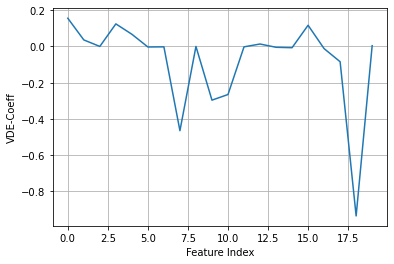

In [1]:
import matplotlib.pyplot as plt

plt.plot([0.15579183376172653,0.03600269004375785,0.00010577215351171762,0.12463370338104103,0.06732187398192177,-0.0030292972291778636,-0.002175500929347626,-0.46529172556485365,0.00011172094221012312,-0.2965840504619044,-0.2655191462823809,-0.0022003130979712042,0.01343309184677215,-0.00461451156288177,-0.006958576763147666,0.1170425588449822,-0.01198404406428732,-0.08440487007598951,-0.9360711878310591,0.004221673072322858])

plt.ylabel('VDE-Coeff')
plt.xlabel('Feature Index')
plt.grid()
plt.show()